In [6]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [8]:
options(repr.plot.height=4.5, repr.matrix.max.rows=15)

Let's flip a coin:

In [3]:
flips = sample(c("Red", "Blue"), 100, replace=TRUE, prob=c(0.4, 0.6))
flips

[1] "Blue" "Blue" "Blue" "Blue" "Blue" "Blue" "Red"  "Blue" "Blue" "Blue"
 [11] "Red"  "Blue" "Blue" "Blue" "Red"  "Blue" "Red"  "Blue" "Blue" "Red" 
 [21] "Blue" "Blue" "Blue" "Blue" "Blue" "Blue" "Red"  "Blue" "Blue" "Blue"
 [31] "Blue" "Blue" "Blue" "Red"  "Red"  "Red"  "Blue" "Blue" "Blue" "Blue"
 [41] "Blue" "Blue" "Blue" "Red"  "Red"  "Blue" "Blue" "Red"  "Red"  "Blue"
 [51] "Blue" "Red"  "Blue" "Blue" "Red"  "Blue" "Blue" "Blue" "Blue" "Blue"
 [61] "Blue" "Red"  "Blue" "Red"  "Red"  "Blue" "Red"  "Blue" "Red"  "Red" 
 [71] "Blue" "Red"  "Blue" "Red"  "Blue" "Red"  "Red"  "Red"  "Red"  "Blue"
 [81] "Red"  "Blue" "Blue" "Blue" "Red"  "Red"  "Blue" "Blue" "Blue" "Blue"
 [91] "Blue" "Blue" "Blue" "Blue" "Blue" "Red"  "Blue" "Red"  "Blue" "Red"

What's the % red?

In [4]:
mean(flips == "Red")

[1] 0.33

Let's do many iterations of our 100 flips to see the sampling distribution:

In [5]:
many_means = sapply(1:100, function(i) {
    mean(sample(c("Red", "Blue"), 100, replace=TRUE, prob=c(0.4, 0.6)) == "Red")
})

Plot it:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


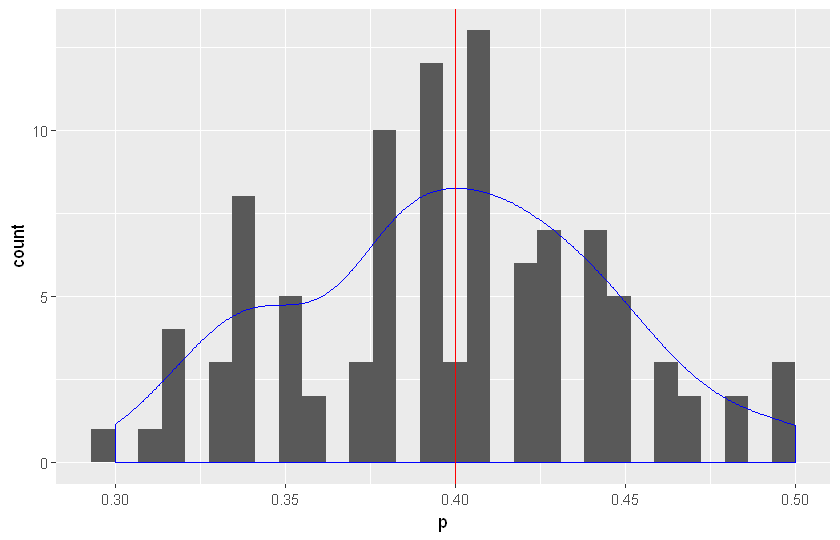

In [14]:
ggplot(data.frame(p=many_means)) +
    aes(x=p) +
    geom_histogram() + 
    geom_density(color="blue") +
    geom_vline(xintercept=0.4, color="red")

## Hypothesis Testing

We believe the coin is unfair. Let's _test_:

- $H_0$: coin is fair ($p = 0.5$)
- $H_a$: coin is unfair ($p \ne 0.5$)

In [25]:
flips = sample(c("Red", "Blue"), 100, replace=TRUE, prob=c(0.4, 0.6))

In [26]:
prop.test(sum(flips == "Red"), length(flips), 0.5)


	1-sample proportions test with continuity correction

data:  sum(flips == "Red") out of length(flips), null probability 0.5
X-squared = 4.41, df = 1, p-value = 0.03573
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2955674 0.4929886
sample estimates:
   p 
0.39 


## Enriching our Modeling